# Start of Scene Recog

In [ ]:
# WEIGHTS_PATH = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-places365_weights_tf_dim_ordering_tf_kernels.h5'
# WEIGHTS_PATH_NO_TOP = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-places365_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

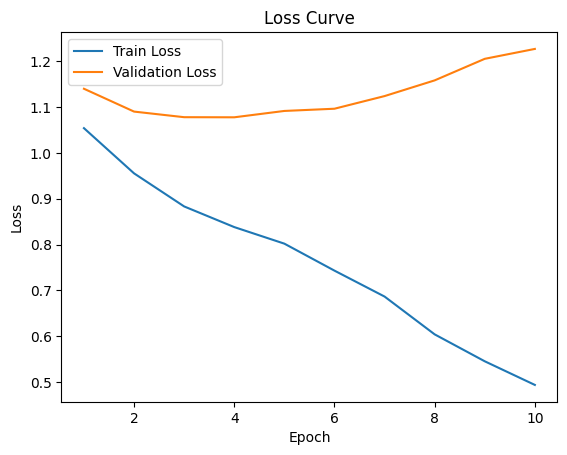

In [ ]:
train_loss_vec = np.array([ 1.053700,0.955200,0.883100,0.838100,0.802000,0.743200,0.686700,0.604300,0.545600,0.494100])
val_loss_vec = np.array([1.139587,1.089811,1.077603,1.077364,1.091214,1.096056,1.123608,1.157834,1.204815,1.226394])
epoch_range = np.arange(1, 11)
plt.plot(epoch_range, train_loss_vec)
plt.plot(epoch_range, val_loss_vec)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train Loss', 'Validation Loss'])
# plt.legend(title='Type of loss', loc='center right', labels=['Train Loss', 'Validation loss'])
# plt.show(loss_curve)


In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pickle

In [ ]:
# import transformers
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from torchvision import transforms
import torchvision.models as models
import os
import numpy as np
import pickle
import urllib
import torch
import tensorflow as tf
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D, Dense, Dropout, Flatten, experimental, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mod_path = '/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules'
#path where all files are saved

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mod_path = '/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules'

In [ ]:
#Used for  pickling the files 
def writer(mod_path, file_name, obj):
  with open(mod_path + f'/{file_name}', 'wb') as f:
    pickle.dump(obj, f)
    
def reader(mod_path, file_name):
  with open(mod_path + f'/{file_name}', 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
# from transformers import TextDataset, DataCollatorForLanguageModeling
# from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW
# from transformers import Trainer, TrainingArguments
# from torch.utils.data import Dataset, DataLoader

In [ ]:
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# model = GPT2LMHeadModel.from_pretrained('gpt2')
# if tokenizer.pad_token is None:
#     tokenizer.add_special_tokens({'pad_token': '[PAD]'})
#     model.resize_token_embeddings(len(tokenizer))

In [ ]:
df = reader(mod_path, 'final_concep_caps_df.pkl')


In [ ]:
x = list(df['Image description'][2759:2770])
print(x)
print(type(x))

['Create a caption where the background is of either jewelry_shop or fountain. The objects present in the image are: 1 cat', 'Create a caption where the background is of either sky or lighthouse. The objects present in the image are: 1 person', 'Create a caption where the background is of either pizzeria or bakery/shop. The objects present in the image are: 1 person, 1 umbrella, 1 pizza', 'Create a caption where the background is of either orchestra_pit or arena/performance. The objects present in the image are: 1 person', 'Create a caption where the background is of either cafeteria or playroom. The objects present in the image are: 7 persons', 'Create a caption where the background is of either stage/indoor or science_museum. The objects present in the image are: 1 person', 'Create a caption where the background is of either dressing_room or shower. The objects present in the image are: 1 person', 'Create a caption where the background is of either playroom or nursery.', 'Create a ca

In [ ]:
print(len(df))

3449


In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.2)
print(len(train_df))
print(len(test_df))

2759
690


In [ ]:
print(df.columns)

Index(['Image', 'Image description', 'True Caption'], dtype='object')


In [ ]:
def add_be_tokens(entry):
  entry['Image description'] = '<SOS> ' + entry['Image description'] + ' <EOS>'
  entry['True Caption'] = '<SOC> ' + entry['True Caption']  + ' <EOC>'
  return entry

In [ ]:
train_df = train_df.loc[:, ['Image description', 'True Caption']]
test_df = test_df.loc[:, ['Image description', 'True Caption']]

In [ ]:
train_df = Dataset.from_pandas(train_df.apply(lambda x: add_be_tokens(x), axis = 1).reset_index(drop = True))
test_df = Dataset.from_pandas(test_df.apply(lambda x: add_be_tokens(x), axis = 1).reset_index(drop = True))

In [ ]:
print(train_df)
print(test_df)

Dataset({
    features: ['Image description', 'True Caption'],
    num_rows: 2759
})
Dataset({
    features: ['Image description', 'True Caption'],
    num_rows: 690
})


In [ ]:
print(train_df[:5][0])

NameError: ignored

In [ ]:
max_len = 0
for entry in train_df:
  max_len = max(max_len, len(entry['Image description']), len(entry['True Caption']))
for entry in test_df:
  max_len = max(max_len, len(entry['Image description']), len(entry['True Caption']))
print(max_len)

289


In [ ]:
self_tokenizer = Tokenizer(filters = '', oov_token = '<OOV>') # set the Out-of-vocab tokens
def fit_tokenizer(tokenizer, df):
  tokenizer.fit_on_texts(df['Image description'])
  tokenizer.fit_on_texts(df['True Caption'])
  return tokenizer
self_tokenizer = fit_tokenizer(self_tokenizer, train_df)
self_tokenizer = fit_tokenizer(self_tokenizer, test_df)

In [ ]:
model_type = 't5-small'
lib_tokenizer = AutoTokenizer.from_pretrained(model_type)

/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
new_tokens_set = set(self_tokenizer.word_index.keys() - lib_tokenizer.vocab.keys())

In [ ]:
import string
new_tokens_clean = set()
for token in new_tokens_set:
  new_tokens_clean.add(token.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
temp = set()
new_tokens = set()
for tokens in new_tokens_clean:
  if '<SOS>'  in tokens or '<EOS>' in tokens:
    continue
  if tokens.isalnum() == False:
    temp.add(tokens)
  else:
    new_tokens.add(tokens)

In [ ]:
lib_tokenizer.add_tokens(list(new_tokens))

4230

In [ ]:
special_tokens = ['<SOS>', '<EOS>', '<EOT>', '<SOT>', 'generate tags']
lib_tokenizer.add_tokens(special_tokens, special_tokens=True)

5

In [ ]:
if lib_tokenizer.pad_token is None:
    lib_tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    # model.resize_token_embeddings(len(tokenizer))

In [ ]:
def ds_proc_func(entries):
  inputs = [example for example in entries['Image description']]
  targets = [example for example in entries['True Caption']]
  model_inputs = lib_tokenizer(inputs, max_length = max_len, truncation = True, padding = True, text_target = targets, return_tensors = 'pt')
  return model_inputs


In [ ]:
train_df = train_df.map(ds_proc_func, batched = True)
test_df = test_df.map(ds_proc_func, batched = True)

Map:   0%|          | 0/2759 [00:00<?, ? examples/s]

Map:   0%|          | 0/690 [00:00<?, ? examples/s]

In [ ]:
print(len(lib_tokenizer.vocab.keys()))

36335


In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer=lib_tokenizer, model= model_type, padding = "max_length")

In [ ]:
model = AutoModelWithLMHead.from_pretrained('t5-small')
# .cuda()
model.resize_token_embeddings(len(lib_tokenizer))

/usr/local/lib/python3.9/dist-packages/transformers/models/auto/modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Embedding(36335, 512)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules/concep_cap_res",
    evaluation_strategy="epoch",
    learning_rate=2e-3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.1,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_df,
    eval_dataset = test_df,
    tokenizer=lib_tokenizer,
    data_collator=data_collator,
)

NameError: ignored

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.053700,1.139587
2,0.955200,1.089811
3,0.883100,1.077603
4,0.838100,1.077364
5,0.802000,1.091214
6,0.743200,1.096056
7,0.686700,1.123608
8,0.604300,1.157834
9,0.545600,1.204815
10,0.494100,1.226394


TrainOutput(global_step=13800, training_loss=0.7666373775316321, metrics={'train_runtime': 1497.8429, 'train_samples_per_second': 18.42, 'train_steps_per_second': 9.213, 'total_flos': 3734080302612480.0, 'train_loss': 0.7666373775316321, 'epoch': 10.0})

In [ ]:
trainer.save_model('/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules/t5_small_ftd.pkl')

NameError: ignored

In [ ]:
model = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules/t5_small_ftd.pkl")
# .cuda()

/usr/local/lib/python3.9/dist-packages/transformers/models/auto/modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [ ]:

print(test_df[0]['Image description'])
idx = 0
res = []
for entry in test_df:
  temp = entry['Image description']
  print(f'Image descrip: {temp}')
  print(f"True caption is {entry['True Caption']}")
  temp = lib_tokenizer(temp, max_length = max_len, truncation = True, padding = True, return_tensors = 'pt').input_ids
  temp = model.generate(temp)
  op = lib_tokenizer.batch_decode(temp)
  res.append(op)
  print(lib_tokenizer.batch_decode(temp))
  print('\n')


<SOS> Create a caption where the background is of either elevator/door or shower. The objects present in the image are: 1 stop sign <EOS>
Image descrip: <SOS> Create a caption where the background is of either elevator/door or shower. The objects present in the image are: 1 stop sign <EOS>
True caption is <SOC> vector free tag eps vector pictogram . <EOC>


/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['<pad> <unk>SOC> the design of the first view of the new jet12s e by']


Image descrip: <SOS> Create a caption where the background is of either ice_floe or raft. The objects present in the image are: 1 teddy bear <EOS>
True caption is <SOC> the forth addition to the small bear collection . <EOC>
['<pad> <unk>SOC> a sperformed ding on the gr12s s']


Image descrip: <SOS> Create a caption where the background is of either soccer_field or stadium/soccer. The objects present in the image are: 1 person, 2 sports balls <EOS>
True caption is <SOC> celebrity during the training session . <EOC>
['<pad> <unk>SOC> perkaraoke n in alocations ionstadium the ']


Image descrip: <SOS> Create a caption where the background is of either gift_shop or art_gallery. <EOS>
True caption is <SOC> all seeing eye pyramid symbol . <EOC>
['<pad> <unk>SOC> a gl12s s ball with the ball.']


Image descrip: <SOS> Create a caption where the background is of either arena/performance or auditorium. The objects present

KeyboardInterrupt: ignored

In [ ]:
writer(mod_path, 'concep_res_list.pkl', res)

In [ ]:
res = reader(mod_path, 'concep_res_list.pkl')
print(res[:10])

[['<pad> <unk>SOC> the latestatement tchairman e a-carrier in'], ['<pad> <unk>SOC> a sskulls ding on the bottom of the other'], ['<pad> <unk>SOC> the house even hstatement an open to the lehardwarestore.'], ['<pad> <unk>SOC> a city will look similar to this home. <unk>E'], ['<pad> <unk>SOC> the view from the car <unk>EOC></s>'], ['<pad> <unk>SOC> a glstatement s of st -'], ['<pad> <unk>SOC> a batmosphere and white version of a batmosphere'], ['<pad> <unk>SOC> we turn any other player in the game <unk>EOC></s>'], ['<pad> <unk>SOC>wholesequined thenotebook of the new album <unk>EOC></s>'], ['<pad> <unk>SOC> a glstatement s with a jar ']]


In [ ]:
for i in range(5):
  print(test_df[i]['Image description'])
  print(test_df[i]['True Caption'])
  print(res[i])

<SOS> Create a caption where the background is of either igloo or kennel/outdoor. The objects present in the image are: 2 cats <EOS>
<SOC> female puppies for person is animal , person is animal . <EOC>
['<pad> <unk>SOC> the latestatement tchairman e a-carrier in']
<SOS> Create a caption where the background is of either ice_shelf or ice_floe. <EOS>
<SOC> vector textured lantern , stylized imprint on bricks . <EOC>
['<pad> <unk>SOC> a sskulls ding on the bottom of the other']
<SOS> Create a caption where the background is of either throne_room or fabric_store. <EOS>
<SOC> the authentic simplicity of a tribal rug can bring warmth to any setting . <EOC>
['<pad> <unk>SOC> the house even hstatement an open to the lehardwarestore.']
<SOS> Create a caption where the background is of either stadium/soccer or stadium/football. The objects present in the image are: 1 car, 1 train, 2 boats <EOS>
<SOC> stadium for broadcast genre is shown in this aerial photograph <EOC>
['<pad> <unk>SOC> a city wi

In [ ]:
print(mod_path)

/content/drive/MyDrive/Information Retrieval Project/gpt-2 finetuning abh/finale_modules


In [ ]:
# print(type(df['Image description'].tolist()))
# print(len(df['Image description'].tolist()))
# train_encodings = tokenizer(df['Image description'].tolist())
# print(len(train_encodings['attention_mask']))

<class 'list'>
3449
3449


In [ ]:
class io_dataset(Dataset):
  def __init__(self, df, tokenizer, max_len):
    self.ip_encodings = tokenizer(df['Image description'].tolist(), truncation=True, padding=True)
    self.op_encodings = tokenizer(df['True Caption'].tolist(), truncation=True, padding=True)['input_ids'] #get the real caption encodings
    print(len(self.op_encodings))
    self.max_len = max_len
  def __len__(self):
    return len(self.ip_encodings['input_ids'])

  def __getitem__(self, idx):
    # item = {key: torch.tensor(val[idx]) for key, val in self.ip_encodings.items()}
    # item['op_encodings'] = torch.tensor(self.op_encodings[idx])
    item = {}
    input_ids = self.ip_encodings['input_ids'][idx]
    att_mask = self.ip_encodings['attention_mask'][idx]

    if len(att_mask) >= self.max_len:
      att_mask = att_mask[:self.max_len]
    else:
      att_mask.extend(0 for _ in range(self.max_len - len(att_mask)))

    if len(input_ids) >= self.max_len:
      input_ids = input_ids[:self.max_len]
    else:
      input_ids.extend(50257 for _ in range(self.max_len - len(input_ids)))

    labels = self.op_encodings[idx]
    if len(labels) >= self.max_len:
      labels = labels[:self.max_len]
    else:
      labels.extend(50257 for _ in range(self.max_len - len(labels)))

    item['input_ids'] = torch.Tensor(input_ids)
    item['attention_mask'] = torch.Tensor(att_mask)
    item['output_ids'] = torch.Tensor(labels)
    return item
new_df = final_df[final_df['Image description'].notna()]
ds = io_dataset(new_df, tokenizer, 200)


3449


In [ ]:
def split(ds, train_frac):
  train_size = int(len(ds)*train_frac)
  test_size = len(ds) - train_size
  train_ds, test_ds = torch.utils.data.random_split(ds, [train_size, test_size])
  return train_ds, test_ds
train_ds, test_ds = split(ds, 0.8)
print(len(train_ds))
print(len(test_ds))

2759
690


In [ ]:
def make_dl(train_ds, test_ds):
  train_dl = DataLoader(train_ds, batch_size = 16, drop_last = True, shuffle = True)
  test_dl = DataLoader(test_ds, batch_size = 8, drop_last = True, shuffle = True)
  return train_dl, test_dl
train_dl, test_dl = make_dl(train_ds, test_ds)

In [ ]:
idx = 0
for b in enumerate(train_dl):
  print(b[1])
  if idx == 5:
    break
  idx+=1

{'input_ids': tensor([[16447.,   257.,  8305.,  ..., 50257., 50257., 50257.],
        [16447.,   257.,  8305.,  ..., 50257., 50257., 50257.],
        [16447.,   257.,  8305.,  ..., 50257., 50257., 50257.],
        ...,
        [16447.,   257.,  8305.,  ..., 50257., 50257., 50257.],
        [16447.,   257.,  8305.,  ..., 50257., 50257., 50257.],
        [16447.,   257.,  8305.,  ..., 50257., 50257., 50257.]]), 'attention_mask': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]]), 'output_ids': tensor([[10424.,  3881.,  6802.,  ..., 50257., 50257., 50257.],
        [ 1169.,  4417.,   286.,  ..., 50257., 50257., 50257.],
        [   64.,   582., 41348.,  ..., 50257., 50257., 50257.],
        ...,
        [   83.,  1258.,  6131.,  ..., 50257., 50257., 50257.],
        [ 6259., 14443.,   379.

In [ ]:
def trainer(model, dl):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # 'cpu'
  model = model.to(device)
  print(device)
  optim = AdamW(model.parameters(), lr = 1e-3)
  model.train()
  for epoch in range(5):
    idx = 0
    for batch in enumerate(train_dl):
      batch = batch[1]
      input_ids = torch.tensor(batch['input_ids'], dtype = torch.int64).to(device)
      attention_mask = torch.tensor(batch['attention_mask'], dtype = torch.int64).to(device)
      labels = torch.tensor(batch['output_ids'], dtype = torch.int64).to(device)
      optim.zero_grad()
    #   print(input_ids.shape)
    #   print(attention_mask.shape)
    #   print(labels.shape)
      outputs = model(input_ids, attention_mask = attention_mask, labels = labels)
      print(outputs)
      loss = outputs[0]
      loss.backward()
      optim.step()
      idx+=1
      if (idx+1)%100 == 0:
        print(idx+1)
      break

trainer(model, train_dl)

cuda


<ipython-input-22-226e49b3f5bc>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(batch['input_ids'], dtype = torch.int64).to(device)
<ipython-input-22-226e49b3f5bc>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(batch['attention_mask'], dtype = torch.int64).to(device)
<ipython-input-22-226e49b3f5bc>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch['output_ids'], dtype = torch.int64).to(device)


CausalLMOutputWithCrossAttentions(loss=tensor(0.3227, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[[-6.4182e+00, -5.6423e+00, -7.3387e+00,  ..., -7.6963e+00,
          -7.2105e+00, -5.3198e-01],
         [-8.3896e+00, -7.7702e+00, -9.4695e+00,  ..., -9.7726e+00,
          -9.0203e+00, -5.7768e-01],
         [-8.1585e+00, -7.6413e+00, -9.6759e+00,  ..., -1.1079e+01,
          -8.5719e+00, -2.3344e-01],
         ...,
         [-2.6127e+01, -2.5418e+01, -2.9011e+01,  ..., -3.1650e+01,
          -2.8879e+01, -2.8848e-01],
         [-6.6725e+01, -6.5004e+01, -7.0013e+01,  ..., -7.7202e+01,
          -7.5084e+01, -2.5322e+00],
         [-2.5608e+01, -2.4837e+01, -2.8046e+01,  ..., -3.0783e+01,
          -2.8221e+01, -3.1542e-01]],

        [[-6.9019e+00, -6.4742e+00, -8.5931e+00,  ..., -9.9093e+00,
          -7.3608e+00, -1.0235e-01],
         [-5.9063e+00, -5.0925e+00, -6.2227e+00,  ..., -6.6013e+00,
          -6.3349e+00, -6.0463e-01],
         [-7.2099e+00, -6.5284e+00, -

OutOfMemoryError: ignored

In [ ]:
import os
%env TORCH_USE_CUDA_DSA=1
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

env: TORCH_USE_CUDA_DSA=1


In [ ]:
torch.save(model, 'gpt-2_finetuned.pt')

RuntimeError: ignored

In [ ]:
def test(model, test_dl):  
  # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  device = torch.device('cpu')
  results = []
  m1 = model.to(device)
  for batch in enumerate(test_dl):
    batch = batch[1]
    input_ids = torch.tensor(batch['input_ids'], dtype = torch.long).to(device)
    att_mask = torch.tensor(batch['attention_mask'], dtype = torch.long).to(device)
    print(input_ids.shape)
    print(att_mask.shape)
    op_ids = model.generate(input_ids, attention_mask = att_mask, max_new_tokens = 100, do_sample=True, top_k = 0)
    for i in range(op_ids.shape[0]):
      outputs = tokenizer.decode(op_ids[i], skip_special_tokens = True)
      results.append(outputs)
    break
  print(len(results))
  return results
res = test(model, test_dl)


<ipython-input-18-a63313f11855>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(batch['input_ids'], dtype = torch.long).to(device)
<ipython-input-18-a63313f11855>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  att_mask = torch.tensor(batch['attention_mask'], dtype = torch.long).to(device)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([8, 200])
torch.Size([8, 200])
8


# @KARAN EOF FINETUNING. No need to run cells after this.



In [ ]:
print(res)

['Create a caption where the background is of either clothing_store or department_store.', 'Create a caption where the background is of either discotheque or stage/indoor. The objects present in the image are: 1 personURA', 'Create a caption where the background is of either childs_room or art_studio.', 'Create a caption where the background is of either stadium/soccer or stadium/football. The objects present in the image are: 9 persons', 'Create a caption where the background is of either veterinarians_office or art_studio. The objects present in the image are: 1 person', 'Create a caption where the background is of either pet_shop or natural_history_museum. The objects present in the image are: 1 bird, 1 bowl', 'Create a caption where the background is of either kindergarden_classroom or nursing_home. The objects present in the image are: 3 persons, 1 handbag', 'Create a caption where the background is of either construction_site or arena/performance. The objects present in the image

In [ ]:
#gives a dictionary of idx : scene_described (there are 365 different possible scenes)
#NO NEED TO RUN THIS. Just load from the cell below. 
def get_scene_dict():
  with open('/content/drive/MyDrive/IR Project/Dataset/scene_categories.txt', 'r') as f:
    categories = f.readlines()
  categories = [c.strip().split(' ')[0][3:] for c in categories]

  scene_dict = {}
  for i in range(len(categories)):
      place = categories[i]
      scene_dict[i] = place
  return scene_dict
ceen_dict = get_scene_dict()
writer(mod_path, 'scene_dict.pkl', ceen_dict)


In [ ]:
ceen_dict = reader(mod_path, 'scene_dict.pkl')

In [ ]:
#VGG16 model that is trained for scene recog. 
def vgg16(weights_path, top=True):

  model = tf.keras.models.Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=365, activation="softmax"))

  model.load_weights(filepath=weights_path) #assign the pre-trained weights

  sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss='categorical_crossentropy')

  return model
tf.keras.backend.set_image_data_format('channels_last')

In [ ]:
#JUST USE THIS SAVED MODEL
scene_model = reader(mod_path, 'scene_model.pkl')

#SKIP EXEC OF THE CELL BELOW

In [ ]:
weights_file = 'vgg16-places365_weights_tf_dim_ordering_tf_kernels.h5'
weights_path = tf.keras.utils.get_file(weights_file, WEIGHTS_PATH)
base_model = vgg16(weights_path, top=True)
base_model.trainable = False
base_model.summary()

543085444/543085444 [==============================] - 10s 0us/step


In [ ]:
ds_path = '/content/drive/MyDrive/IR Project/Dataset/insta_posts'

In [ ]:
#Helper function for do_scene_recog()
def refine(ceen_dict, lst): 
  scene_list = []
  for idx in lst:
    scene_list.append(ceen_dict[idx])
  return scene_list



In [ ]:
def do_scene_recog(img, model, ceen_dict):

  output = model.predict(img)

  top_k_indices = tf.math.top_k(output, k=5).indices #get the top-5 scenes that are predicted for an image. Sorted on the basis of their probability
  top_5 = top_k_indices.numpy()[0] # this is the scene_values arranged in the order of decreasing probabilities
  scene = top_5[0]
  top_5 = refine(ceen_dict, top_5)
  return top_5

# End of Scene Recog.

Start of Obj Detection

In [ ]:
import torch
obj_model = torch.hub.load('ultralytics/yolov5', 'yolov5x')
import os, pickle
import torchvision
from torchvision.transforms import Resize, Normalize
from torchvision.io import read_image
import torchvision.transforms as t
import numpy as np

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-21 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 166M/166M [00:01<00:00, 164MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# writer(mod_path, 'obj_model.pkl', model)

In [ ]:
obj_model  = reader(mod_path, 'obj_model.pkl')

ModuleNotFoundError: ignored

In [ ]:
def concat(lst) ->str:
  res_str = ''
  for word in lst:
    res_str += word + ' '
  res_str = res_str.strip()
  return res_str

In [ ]:

def do_obj_detection(img, model):
  model = model.to(device)
  res = model(img)
  obj_tokens = str(res).split('\n')[0].split(' ')[3:]
  obj_tokens = concat(obj_tokens)

  return obj_tokens
# tokens = do_obj_detection(obj_model, '/content/drive/MyDrive/Information Retrieval Project/newInstaData/aimeesong/2023-03-23_14-33-29_UTC.jpg' )
# print(tokens)

# END OF Object Detection

**DATASET WORK**

In [ ]:
scene_model = reader(mod_path, 'scene_model.pkl')
obj_model = reader(mod_path, 'obj_model.pkl')
ceen_dict = reader(mod_path, 'scene_dict.pkl')

ModuleNotFoundError: ignored

In [ ]:
ds_path = '/content/drive/MyDrive/Information Retrieval Project/newInstaData/'


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def generate(ds_path, scene_model, ceen_dict, obj_model):
  obj_model = obj_model.to(device)
  for dir in sorted(os.listdir(ds_path)):
    ftr_dict = {}
    forbidden = set(['scrape.sh', 'data.pkl','data_with_generated_captions.pkl', 'jennakutcher', 'thestylevisitor', 'troprouge', 'vbiancav', 'victoriadariano' ])
    if dir in forbidden:
      continue
    for img in os.listdir(ds_path + f'{dir}'):
      st = set(os.listdir(ds_path + f'{dir}'))
      
      if img[-3:] != 'jpg':
        continue
      print(dir)
      if 'image_features_dict.pkl' in st:
        req_dict = reader(ds_path + f'/{dir}', 'image_features_dict.pkl')
        if len(req_dict) != 0:
          continue
      img_path = ds_path + f'/{dir}/{img}'
      top_5 = do_scene_recog(img_path, scene_model, ceen_dict)      
      obj_tokens = do_obj_detection(obj_model, img_path)
      lst = [top_5, obj_tokens]
      ftr_dict[img] = lst
    if len(ftr_dict) !=0:
      writer(ds_path+f'/{dir}', 'image_features_dict.pkl', ftr_dict)
      
generate(ds_path, scene_model, ceen_dict, obj_model)

aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
aimeesong
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwaysjudging
alwa

UnidentifiedImageError: ignored

In [ ]:
ds_path = '/content/drive/MyDrive/Information Retrieval Project/newInstaData'
# a1 = reader(ds_path+f'/laurencaruso_', 'image_features_dict.pkl' )
# print(a1['2022-05-03_18-16-32_UTC_1.jpg'])

In [ ]:
!pip install transformers

# Fine Tuning GPT-2

**Making Dataset**

In [ ]:
df = reader(ds_path, 'img_description_df.pkl')
print(len(df))
#USE THIS DF FOR FUTURE FINE TUNING

1670


In [ ]:
def make_query(scene_list: list, objs ) ->list:
  query = 'Create a caption where'
  query += f' the background is of either {scene_list[0]} or {scene_list[1]}.'
  if objs != '(no detections)':
    query += f' The objects present in the image are: '
    query += f'{objs}'
  return query

scene_lst = ['art_gallery', 'museum/indoor', 'home_theater', 'art_studio', 'art_school']
obj_list = ['1', 'clock']
query = make_query(scene_lst, obj_list)
print(query)

print(len(query))

Create a caption where the background is of either art_gallery or museum/indoor. The objects present in the image are: ['1', 'clock']
133


In [ ]:
def colate_dicts(ds_path, forbidden_set):
  res_dict = {}
  length = 0
  for dir in os.listdir(ds_path):
    if dir in forbidden_set:
      continue
    if 'image_features_dict.pkl' not in set(os.listdir(ds_path + f'/{dir}')):
      continue
    img_features_dict = reader(ds_path + f'/{dir}', 'image_features_dict.pkl')
    for k,v in img_features_dict.items():
      key = f'{dir}/{k}'
      res_dict[key] = make_query(v[0], v[1])
      length+=1
  print(length)
  return res_dict
r_dict = colate_dicts(ds_path, set(['scrape.sh', 'data.pkl','data_with_generated_captions.pkl', 'jennakutcher', 'thestylevisitor', 'troprouge', 'vbiancav', 'victoriadariano' ]))

    

2914


In [ ]:
ds = reader('/content/drive/MyDrive/Information Retrieval Project/newInstaData', 'data_with_generated_captions.pkl')
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# connect the dictionary to the corresponding rows of the dataframe
# we will then finetune the gpt-2 
# then give the results of the dataframe
# test split is 20% and the train is 80%
def refine_df(ds):
  print(len(ds))
  ds = ds.loc[ds['Real_insta_caption'] != '']
  print(len(ds))
  return ds
ds = refine_df(ds)

5528
4108


In [ ]:
import pandas as pd

In [ ]:
#NO NEED TO RUN THIS NOW
def combine_io(res_dict, df, prefix):
  df['img_description'] = None
  i = 0
  for k,v in res_dict.items():
    k1 = prefix + k
    idx = df['Image'].loc[lambda x: x==k1].index
    if len(idx) == 1:
      try:
        df.iat[idx.tolist()[0], 3] = v
        i+=1
      except:
        continue
  print(i)
  return df

prefix = '/content/drive/MyDrive/Information Retrieval Project/newInstaData/'
df = combine_io(r_dict, ds, prefix)

print(df.iloc[0][3])

1670
None


In [ ]:
#NO NEED TO RUN THIS NOW
def refine_2(df):
  print(len(df))
  df = df.loc[df['img_description'].notna()]
  print(len(df))
  return df
df = refine_2(df)
print(len(df))
writer(ds_path, 'img_description_df.pkl', df)

1670
1670
1670


**Model finetuning and splits**

In [ ]:
!pip install transformers

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

In [ ]:
print(df.columns)

Index(['Image', 'Real_insta_caption', 'Generated_descriptive_caption',
       'img_description'],
      dtype='object')


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', model_max_length = 64)
model = GPT2LMHeadModel.from_pretrained('gpt2')
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

Using pad_token, but it is not set yet.


In [ ]:
class io_dataset(Dataset):
  def __init__(self, df, tokenizer):
    self.ip_encodings = tokenizer(df['Image description'].tolist(), truncation=True, padding=True)
    self.op_encodings = tokenizer(df['True Caption'].tolist(), truncation=True, padding=True)['input_ids'] #get the real caption encodings
    print(len(self.op_encodings))
  def __len__(self):
    return len(self.ip_encodings['input_ids'])

  def __getitem__(self, idx):
    # item = {key: torch.tensor(val[idx]) for key, val in self.ip_encodings.items()}
    # item['op_encodings'] = torch.tensor(self.op_encodings[idx])
    item = {}
    item['input_ids'] = torch.Tensor(self.ip_encodings['input_ids'][idx])
    item['attention_mask'] = torch.Tensor(self.ip_encodings['attention_mask'][idx])
    self.op_encodings[idx].extend(50257 for _ in range(14))
    item['output_ids'] = torch.Tensor(self.op_encodings[idx])
    # .extend([ for _ in range(5)])
    return item
new_df = final_df[final_df['Image description'].notna()]
ds = io_dataset(new_df, tokenizer)


3449


In [ ]:
def split(ds, train_frac):
  train_size = int(len(ds)*train_frac)
  test_size = len(ds) - train_size
  train_ds, test_ds = torch.utils.data.random_split(ds, [train_size, test_size])
  return train_ds, test_ds
train_ds, test_ds = split(ds, 0.8)
print(len(train_ds))
print(len(test_ds))

2759
690


In [ ]:
writer(mod_path, 'concep_train_ds.pkl', train_ds)
writer(mod_path, 'conceP_test_ds.pkl', test_ds)

In [ ]:
def make_dl(train_ds, test_ds):
  train_dl = DataLoader(train_ds, batch_size = 16, drop_last = True, shuffle = True)
  test_dl = DataLoader(test_ds, batch_size = 8, drop_last = True, shuffle = True)
  return train_dl, test_dl
train_dl, test_dl = make_dl(train_ds, test_ds)


In [ ]:
writer(mod_path, 'concep_train_dl.pkl', train_dl)
writer(mod_path, 'concep_test_dl.pkl', test_dl)


In [ ]:
from transformers import AdamW

In [ ]:
def trainer(model, dl):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  print(device)
  optim = AdamW(model.parameters(), lr = 1e-3)
  model.train()
  for epoch in range(5):
    idx = 0
    for batch in enumerate(train_dl):
      batch = batch[1]
      input_ids = torch.tensor(batch['input_ids'], dtype = torch.int64).to(device)
      attention_mask = torch.tensor(batch['attention_mask'], dtype = torch.long).to(device)
      labels = torch.tensor(batch['output_ids'], dtype = torch.long).to(device)
      print(input_ids.shape)
      print(input_ids[0])
      print(labels.shape)
      print(labels[0])
      print(attention_mask.shape)
      optim.zero_grad()
      outputs = model(input_ids, attention_mask = attention_mask, labels = labels)
      loss = outputs[0]
      loss.backward()
      optim.step()
      if idx == 5:
        break
      idx+=1

trainer(model, train_dl)

NameError: ignored

In [ ]:
def test(model, test_dl):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  results = []
  model = model.to(device)
  for batch in enumerate(test_dl):
    batch = batch[1]
    input_ids = torch.tensor(batch['input_ids'], dtype = torch.int64).to(device)
    att_mask = torch.tensor(batch['attention_mask'], dtype = torch.int64).to(device)
    op_ids = model.generate(input_ids, attention_mask = att_mask, max_new_tokens = 50, do_sample=True, top_k=0)
    outputs = tokenizer.decode(op_ids[0], skip_special_tokens = True)
    results.append(outputs)
  print(len(results))
  return results
res = test(model, test_dl)

<ipython-input-32-02a702140a29>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(batch['input_ids'], dtype = torch.int64).to(device)
<ipython-input-32-02a702140a29>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  att_mask = torch.tensor(batch['attention_mask'], dtype = torch.int64).to(device)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_tok

41


In [ ]:
writer(mod_path, 'gpt_2_finetune_res.pkl', res)
writer(ds_path, 'gpt_2_finetune_res.pkl', res)


In [ ]:
for i in range(10):
  print(res[i])

Generate a caption where the background/scene is of either art_gallery or art_studio. The objects present in the image are: 1 sports ballsital
ve️, mytime #Y so.#anarar. one ofines @ keep?!
anad The� what
Generate a caption where the background/scene is of either roof_garden or topiary_garden. The objects present in the image are: 2 persons0 week  last�
 1 some album� and I
black surroundings level year (the through!).
Generate a caption where the background/scene is of either corn_field or orchard. hunt celebrating back � in - Ah a myChristmas�éseY.the cute
 some our it we?� #s!3age� @ you you, step laughter
Generate a caption where the background/scene is of either museum/indoor or beauty_salon. The objects present in the image are: 1 person, 1 chair, 3 books� make.. Did a Icon- #� thinkingvers firstleg over flowerant Drew wasomal! icezmoon We shell??beaut! in
Generate a caption where the background/scene is of either clothing_store or inn/outdoor. The objects present in the image ar

In [ ]:
x = reader('/content/drive/MyDrive/Information Retrieval Project/flickr dataset', 'train_cap_dict.pkl')
print(x.items())

dict_items([('1000092795.jpg', ['sos  two young guys with shaggy hair look at their hands while hanging out in the yard  eos', 'sos  two young white males are outside near many bushes  eos', 'sos  two men in green shirts are standing in a yard  eos', 'sos  a man in a blue shirt standing in a garden  eos', 'sos  two friends enjoy time spent together  eos']), ('10002456.jpg', ['sos  several men in hard hats are operating a giant pulley system  eos', 'sos  workers look down from up above on a piece of equipment  eos', 'sos  two men working on a machine wearing hard hats  eos', 'sos  four men on top of a tall structure  eos', 'sos  three men on a large rig  eos']), ('1000268201.jpg', ['sos  a child in a pink dress is climbing up a set of stairs in an entry way  eos', 'sos  a little girl in a pink dress going into a wooden cabin  eos', 'sos  a little girl climbing the stairs to her playhouse  eos', 'sos  a little girl climbing into a wooden playhouse  eos', 'sos  a girl going into a wooden 

In [ ]:
#train on Conceptual captions
# then test on IG images

# Tuning on Conceptual Captions

In [ ]:
from io import BytesIO
from PIL import Image
import urllib
import requests
import pandas as pd
import numpy as np

In [ ]:
df = reader('/content/drive/MyDrive/Information Retrieval Project/Image captioning datasets/Pickle files', 'conceptual.pkl')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.columns)

Index(['Original Caption', 'Image'], dtype='object')


In [ ]:
print(df.head(10))

                                    Original Caption  \
0    item : drawing of a figure surrounded by person   
1  the sidewalk near the corner of streets has on...   
2                  actor attends the season premiere   
3  another possible invitation -- love the font ,...   
4               a woman walks her dog on the beach .   
5  using shrubs and hedges as fences is a very po...   
6   a beautiful day with some buildings and plants .   
7                        what kind of bird is this ?   
8  close up portrait of a smiling middle aged wom...   
9            young woman trekking through the forest   

                                               Image  
0  https://i.pinimg.com/736x/f9/fd/48/f9fd4878090...  
1  http://s3-us-west-2.amazonaws.com/ktoo/2017/08...  
2  https://media.gettyimages.com/photos/aidan-gil...  
3  https://i.pinimg.com/736x/c1/c3/3a/c1c33aed458...  
4  https://media.gettyimages.com/photos/woman-wal...  
5                              http://ift.tt/1URq5fp 

In [ ]:
print(df.iloc[0][1])

https://i.pinimg.com/736x/f9/fd/48/f9fd48780900641ded7ab53d74fe86fe--figure-painting-figure-drawing.jpg


In [ ]:
from keras import backend as K    
K.set_image_data_format('channels_last')  

In [ ]:
def do_img_preproc_VGG(url):
  response = requests.get(url)
  img_pil = image.load_img(BytesIO(response.content), target_size=(224, 224))
  img = image.img_to_array(img_pil)
  img = tf.keras.applications.vgg16.preprocess_input(img)
  img = tf.expand_dims(img, axis = 0)  
  return img

def process_concep_caps(df, scene_model, ceen_dict, obj_model):
  transform = t.ToPILImage()
  img_paths = list(df['Image'])

  for idx in range(len(img_paths)):

    img_path = img_paths[idx]

    try:
      response = requests.get(img_path)

      img_pil = image.load_img(BytesIO(response.content))

      img_s = do_img_preproc_VGG(img_path)

      top_5 = do_scene_recog(img_s, scene_model, ceen_dict)
      objs_detected = do_obj_detection(img_pil, obj_model)      
      query = make_query(top_5, objs_detected)
      df.at[idx, 'Image description'] = query

    except:
      continue
    
    if (idx+1)%5 == 0:
      print(idx)
    if (idx+1)%500 == 0:
      writer(mod_path, 'concep_df.pkl', df)
    if idx == 4000:
      break
  return df
final_df = process_concep_caps(res_df, scene_model, ceen_dict, obj_model)
print(final_df.head(5))

1/1 [==============================] - 0s 21ms/step
4
1/1 [==============================] - 0s 19ms/step
9
1/1 [==============================] - 0s 32ms/step
14
1/1 [==============================] - 0s 19ms/step
19
1/1 [==============================] - 0s 20ms/step
24
1/1 [==============================] - 0s 33ms/step
34
1/1 [==============================] - 0s 19ms/step
39
1/1 [==============================] - 0s 19ms/step
44
1/1 [==============================] - 0s 19ms/step
49
1/1 [==============================] - 0s 20ms/step
54
1/1 [==============================] - 0s 20ms/step
59
1/1 [==============================] - 0s 28ms/step
64
1/1 [==============================] - 0s 35ms/step
69
1/1 [==============================] - 0s 22ms/step
79
1/1 [==============================] - 0s 23ms/step
89
1/1 [==============================] - 0s 20ms/step
94
1/1 [==============================] - 0s 19ms/step
99
1/1 [==============================] - 0s 28ms/step
104
1/1 [======

1/1 [==============================] - 0s 28ms/step
2689
1/1 [==============================] - 0s 32ms/step
2694
1/1 [==============================] - 0s 21ms/step
2699
1/1 [==============================] - 0s 21ms/step
2704
1/1 [==============================] - 0s 20ms/step
2709
1/1 [==============================] - 0s 31ms/step
2714
1/1 [==============================] - 0s 34ms/step
2719
1/1 [==============================] - 0s 20ms/step
2724
1/1 [==============================] - 0s 22ms/step
2729
1/1 [==============================] - 0s 21ms/step
2734
1/1 [==============================] - 0s 23ms/step
2739
1/1 [==============================] - 0s 29ms/step
2744
1/1 [==============================] - 0s 19ms/step
2759
1/1 [==============================] - 0s 19ms/step
2764
1/1 [==============================] - 0s 21ms/step
2769
1/1 [==============================] - 0s 18ms/step
2774
1/1 [==============================] - 0s 19ms/step
2779
1/1 [==========================

In [ ]:
print(final_df['Image description'][0])

Create a caption where the background is of either art_gallery or museum/indoor. The objects present in the image are: 1   c l o c k


In [ ]:
transf = t.ToPILImage()    

img = transf(np.array(image1))
print(type(img))

<class 'PIL.Image.Image'>


In [ ]:
caps = df.loc[:, 'Original Caption']
img_paths = df.loc[:, 'Image']
cap_list = list(caps)
print(len(cap_list))
img_description = [None]*len(cap_list)
print(len(img_description))
res_df = pd.DataFrame(list(zip(img_paths, img_description, cap_list)),columns=['Image', 'Image description', 'True Caption'])

2007527
2007527


In [ ]:
writer(mod_path, 'final_concep_caps_df.pkl', final_df)

In [ ]:
writer(mod_path, 'res_df.pkl', res_df)

In [ ]:
print(final_df.head(5))

                                               Image  \
0  https://i.pinimg.com/736x/f9/fd/48/f9fd4878090...   
1  http://s3-us-west-2.amazonaws.com/ktoo/2017/08...   
2  https://media.gettyimages.com/photos/aidan-gil...   
3  https://i.pinimg.com/736x/c1/c3/3a/c1c33aed458...   
4  https://media.gettyimages.com/photos/woman-wal...   

                                   Image description  \
0  Create a caption where the background is of ei...   
1  Create a caption where the background is of ei...   
2  Create a caption where the background is of ei...   
3  Create a caption where the background is of ei...   
4  Create a caption where the background is of ei...   

                                        True Caption  
0    item : drawing of a figure surrounded by person  
1  the sidewalk near the corner of streets has on...  
2                  actor attends the season premiere  
3  another possible invitation -- love the font ,...  
4               a woman walks her dog on the beach 

In [ ]:

nec = final_df['Image description'].count()
print(nec)

3449


In [ ]:
res_df.at[0, 'Image description'] =  None
print(res_df.iat[0, 1])

None


In [ ]:
print(final_df.columns)

Index(['Image', 'Image description', 'True Caption'], dtype='object')


In [ ]:
print(type(final_df))

<class 'pandas.core.frame.DataFrame'>
